In [9]:
pip install praw

In [10]:
!pip install vaderSentiment

In [11]:
!pip install transformers

In [12]:
import praw  # Reddit API library
import pandas as pd  # Data manipulation
from datetime import datetime  # For date and time management
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # VADER
from transformers import BertTokenizer, BertForSequenceClassification, pipeline  # BERT

In [13]:
reddit = praw.Reddit(client_id='AMJkWd1kA9tFU2YY0ighSg',
                     client_secret='Y3mBSD0rgzG9d_DJM0YClRYANN7E-g',
                     user_agent='test',
                     username='Kabir1026',
                     password='amPzW(#,hDXn,2H')

In [14]:
# Function to clean text data
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single-letter words
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single-letter words at the beginning
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Collapse multiple spaces into one
    return text

# Load CSV files
df_crypto_currency = pd.read_csv('crypto_1.csv')
df_bitcoin = pd.read_csv('crypto_2.csv')
df_satoshi_street = pd.read_csv('crypto_3.csv')

# Combine the DataFrames and clean data
combined_df = pd.concat([df_crypto_currency, df_bitcoin, df_satoshi_street], ignore_index=True)

# Apply the cleaning function to the 'Text' column
combined_df['cleaned_text'] = combined_df['Text'].apply(clean_text)

# Drop duplicates and rows with missing values after cleaning
combined_df.drop_duplicates(inplace=True)
combined_df.dropna(inplace=True)

In [17]:
from transformers import BertTokenizer

# Initialize BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [18]:
# Function to truncate text sequences exceeding 512 tokens
def truncate_text(text, max_length=512):
    tokens = bert_tokenizer.tokenize(text)  # Tokenize the text
    if len(tokens) > max_length:
        truncated_text = bert_tokenizer.convert_tokens_to_string(tokens[:max_length])  # Keep only the first 512 tokens
    else:
        truncated_text = text
    return truncated_text

# Apply text truncation to the cleaned text
combined_df['truncated_text'] = combined_df['cleaned_text'].apply(truncate_text)

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          1223 non-null   object
 1   Text            1223 non-null   object
 2   Date            1223 non-null   object
 3   Score           1223 non-null   int64 
 4   cleaned_text    1223 non-null   object
 5   truncated_text  1223 non-null   object
dtypes: int64(1), object(5)
memory usage: 57.5+ KB


In [20]:
combined_df.head()

,Author,Text,Date,Score,cleaned_text,truncated_text
0,PIE4FOOU,Waiting on my mom to call me and ask about inv...,2023-12-06 14:20:17,1021,waiting on my mom to call me and ask about inv...,waiting on my mom to call me and ask about inv...
1,IDGAFOS,We still haven't hit all time highs... people ...,2023-12-06 13:12:31,387,we still haven hit all time highs people need ...,we still haven hit all time highs people need ...
2,UhUhWaitForTheCream,"Everyone, I mean, EVERYONE thinks this is a bu...",2023-12-06 11:52:12,769,everyone mean everyone thinks this is bull tra...,everyone mean everyone thinks this is bull tra...
3,Disavowed_Rogue,I say stop thinking about it and just keep dol...,2023-12-06 11:37:38,301,i say stop thinking about it and just keep dol...,i say stop thinking about it and just keep dol...
4,Ninja_Gogen,Cathie Wood selling Coinbase stock is very bul...,2023-12-06 13:01:53,34,cathie wood selling coinbase stock is very bul...,cathie wood selling coinbase stock is very bul...


In [23]:
# Initialize BERT tokenizer and model for sentiment analysis
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Use the BERT pipeline for sentiment analysis on truncated text
bert_pipeline = pipeline("sentiment-analysis", model=bert_model, tokenizer=bert_tokenizer)
combined_df['BERT_Sentiment'] = combined_df['truncated_text'].apply(lambda text: bert_pipeline(text)[0]['label'])

In [22]:
combined_df['truncated_text'] = combined_df['truncated_text'].str[:512]

In [24]:
!pip install vaderSentiment

In [27]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from gensim import corpora, models
import nltk
import re

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # VADER

# Initialize VADER sentiment intensity analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis on truncated text
combined_df['VADER_Sentiment'] = combined_df['truncated_text'].apply(lambda text: vader_analyzer.polarity_scores(text)['compound'])

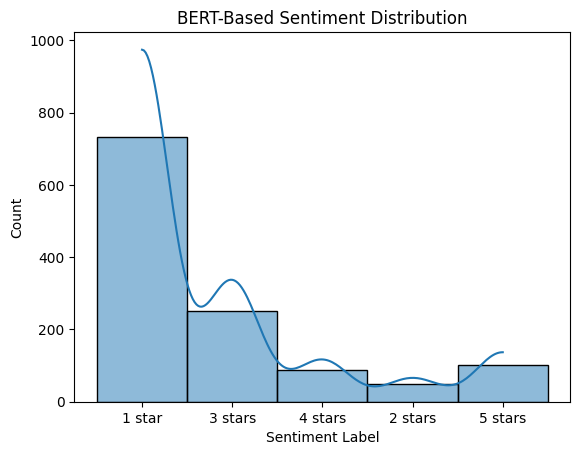

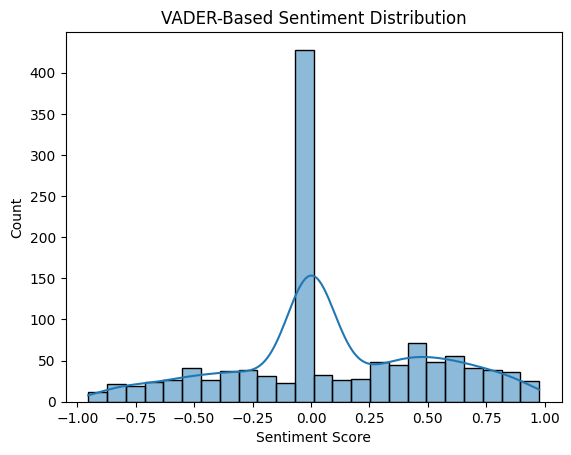

In [29]:
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting

# Plotting BERT-based sentiment distribution
sns.histplot(combined_df['BERT_Sentiment'], kde=True)
plt.title("BERT-Based Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

# Plotting VADER-based sentiment distribution
sns.histplot(combined_df['VADER_Sentiment'], kde=True)
plt.title("VADER-Based Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()


In [31]:
# Function to convert star ratings to numeric values
def star_to_numeric(star_rating):
    rating_dict = {
        '1 star': 1,
        '2 stars': 2,
        '3 stars': 3,
        '4 stars': 4,
        '5 stars': 5
    }
    return rating_dict.get(star_rating, 0)  # Default to 0 if not found

# Apply the conversion function to BERT sentiment
combined_df['BERT_Sentiment_Numeric'] = combined_df['BERT_Sentiment'].apply(star_to_numeric)

Correlation between BERT and VADER sentiment scores: -0.13203412514146426


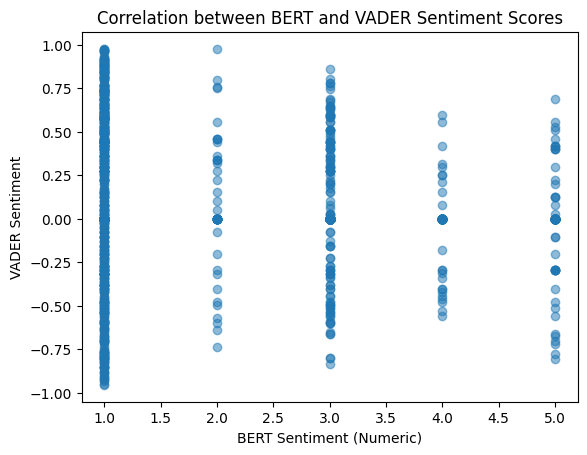

In [32]:
# Ensure VADER sentiment is numeric
combined_df['VADER_Sentiment'] = pd.to_numeric(combined_df['VADER_Sentiment'], errors='coerce')  # Convert to numeric

# Correlation between BERT and VADER sentiment scores
correlation = combined_df['BERT_Sentiment_Numeric'].corr(combined_df['VADER_Sentiment'])

print(f"Correlation between BERT and VADER sentiment scores: {correlation}")

# Scatter plot to visualize the correlation
plt.scatter(combined_df['BERT_Sentiment_Numeric'], combined_df['VADER_Sentiment'], alpha=0.5)
plt.xlabel("BERT Sentiment (Numeric)")
plt.ylabel("VADER Sentiment")
plt.title("Correlation between BERT and VADER Sentiment Scores")
plt.show()

In [33]:
# Calculate the absolute difference between BERT and VADER sentiment scores
combined_df['Sentiment_Difference'] = abs(combined_df['BERT_Sentiment_Numeric'] - combined_df['VADER_Sentiment'])

# Identify cases where the difference is significant (e.g., greater than a threshold)
significant_difference_threshold = 2  # Example threshold
discrepant_cases = combined_df[combined_df['Sentiment_Difference'] > significant_difference_threshold]

print("Cases with significant differences between BERT and VADER sentiment analysis:")
print(discrepant_cases[['Text', 'BERT_Sentiment', 'VADER_Sentiment', 'Sentiment_Difference']])


Cases with significant differences between BERT and VADER sentiment analysis:
                                                   Text BERT_Sentiment  \
8     Also the biggest crypto company Binance gettin...        3 stars   
9                          Last chance to buy above 44k        4 stars   
20                                      Lock in profits        3 stars   
24    No one knows anything until time passes and we...        4 stars   
28                               Yes but also maybe not        3 stars   
...                                                 ...            ...   
1215                          Fuck, this hits too close        3 stars   
1216                            When doing nothing wins        4 stars   
1219  The lesson to pull out is one many men have ye...        5 stars   
1220                    Goddamn ain't that the truth...        2 stars   
1222  I think that's the best strategy - buy and for...        3 stars   

      VADER_Sentiment  Sentiment_

In [34]:
# Examine texts with significant differences
for index, row in discrepant_cases.iterrows():
    print(f"Text: {row['Text']}")
    print(f"BERT Sentiment: {row['BERT_Sentiment']}")
    print(f"VADER Sentiment: {row['VADER_Sentiment']}")
    print("-----")


Text: Also the biggest crypto company Binance getting massive fine and losing its CEO. Barely a blimp.

If things were shit that would cause a bigger dip
BERT Sentiment: 3 stars
VADER Sentiment: -0.6597
-----
Text: Last chance to buy above 44k
BERT Sentiment: 4 stars
VADER Sentiment: 0.25
-----
Text: Lock in profits
BERT Sentiment: 3 stars
VADER Sentiment: 0.4404
-----
Text: No one knows anything until time passes and we can look at what happened.
BERT Sentiment: 4 stars
VADER Sentiment: -0.296
-----
Text: Yes but also maybe not
BERT Sentiment: 3 stars
VADER Sentiment: 0.2144
-----
Text: Bull traps are a bearmarket thing. We have been in a bullmarket since the FTX collapse in November 22. If anything this is a local overextension.
BERT Sentiment: 3 stars
VADER Sentiment: -0.4939
-----
Text: Unfortunately yes
BERT Sentiment: 4 stars
VADER Sentiment: 0.0772
-----
Text: Yes.. it's a bull trap
BERT Sentiment: 3 stars
VADER Sentiment: 0.1027
-----
Text: The pump has already slowed and will 

In [35]:
# Depending on the findings, consider adjustments like:
# 1. Improving text cleaning to remove ambiguous or redundant elements.
# 2. Applying stricter thresholds for sentiment interpretation.
# 3. Implementing context-aware sentiment analysis to capture nuances like sarcasm or negations.

# Example: Adjust text cleaning to remove extra spaces and punctuation
combined_df['improved_cleaned_text'] = combined_df['truncated_text'].apply(lambda x: re.sub(r'\s+', ' ', re.sub(r'\W', ' ', x)).strip())

In [36]:
# Examine correlations with specific keywords (example)
keywords = ['market sentiment', 'investment', 'bull run', 'bear market', 'Bitcoin', 'Ethereum']
keyword_counts = {keyword: combined_df['truncated_text'].str.contains(keyword, case=False).sum() for keyword in keywords}

# Example: Find the most frequent keywords
print("Keyword counts:")
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")


Keyword counts:
market sentiment: 0
investment: 19
bull run: 30
bear market: 6
Bitcoin: 154
Ethereum: 0


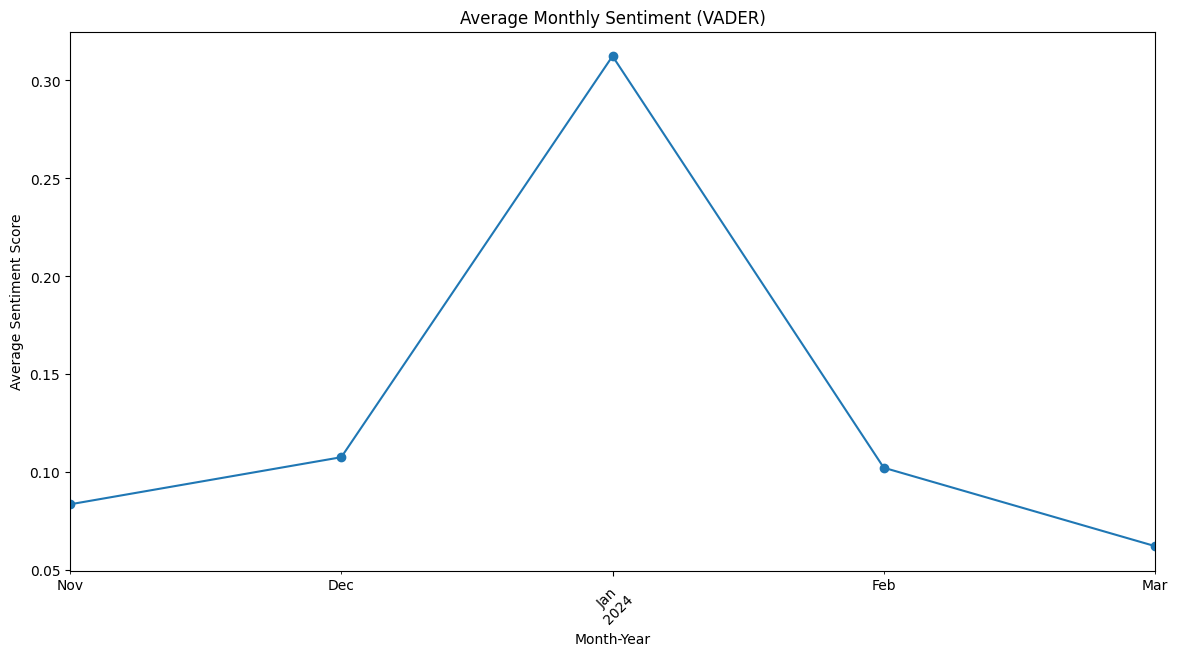

In [41]:
import matplotlib.pyplot as plt  # Plotting
import pandas as pd  # Data manipulation

# Convert the 'Date' column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Add a 'month_year' column with proper datetime format
combined_df['month_year'] = combined_df['Date'].dt.to_period('M')  # Monthly grouping

# Group by month and calculate the mean sentiment
monthly_sentiment = combined_df.groupby('month_year')['VADER_Sentiment'].mean()

# Plot the average monthly sentiment over time
plt.figure(figsize=(14, 7))
monthly_sentiment.plot(title='Average Monthly Sentiment (VADER)', marker='o')

# Set correct x-axis labels
plt.xlabel("Month-Year")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.ylabel('Average Sentiment Score')
plt.show()

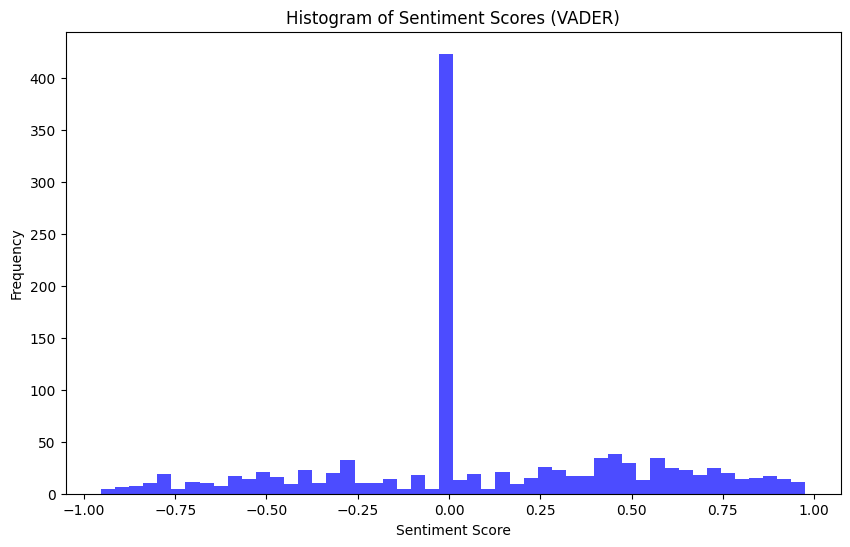

In [42]:
# Create a histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(combined_df['VADER_Sentiment'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Sentiment Scores (VADER)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


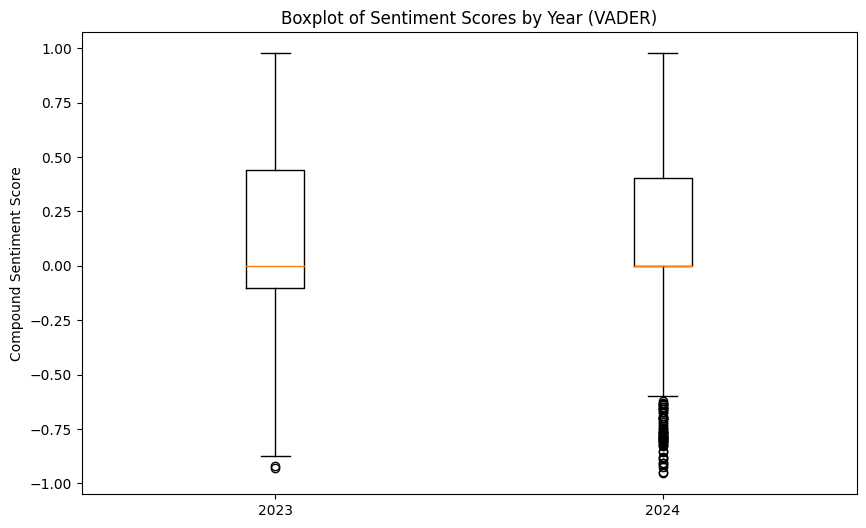

In [46]:
import matplotlib.pyplot as plt  # Plotting
import pandas as pd  # Data manipulation

# Ensure the 'Date' column is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Add a 'Year' column to identify which years have data
combined_df['Year'] = combined_df['Date'].dt.year

# Check which years have data
available_years = combined_df['Year'].unique()

# Create a list to hold data for the boxplot
boxplot_data = []
boxplot_labels = []

# Add 2023 data to the boxplot if available
if 2023 in available_years:
    boxplot_data.append(combined_df[combined_df['Year'] == 2023]['VADER_Sentiment'])
    boxplot_labels.append('2023')

# Add 2024 data to the boxplot if available
if 2024 in available_years:
    boxplot_data.append(combined_df[combined_df['Year'] == 2024]['VADER_Sentiment'])
    boxplot_labels.append('2024')

# Create the boxplot with available years
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=boxplot_labels)
plt.title('Boxplot of Sentiment Scores by Year (VADER)')
plt.ylabel('Compound Sentiment Score')
plt.show()


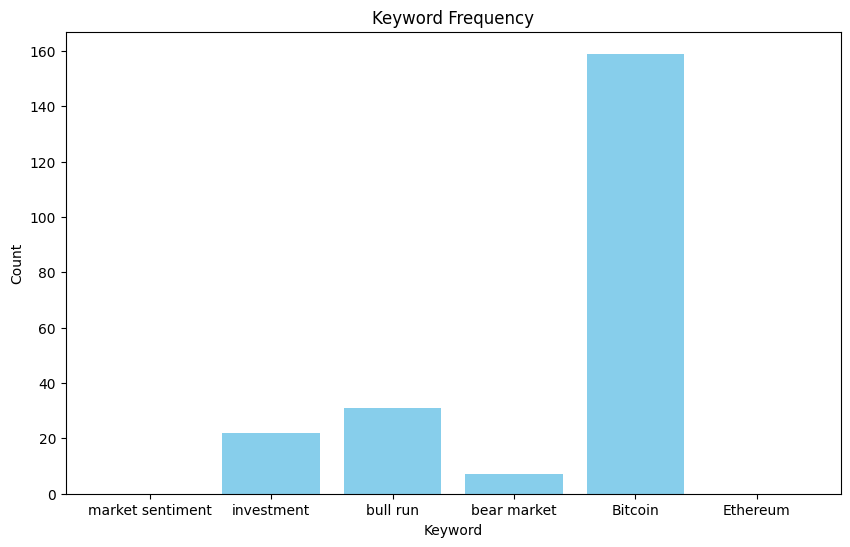

In [45]:
# Keywords to check for frequency
keywords = ['market sentiment', 'investment', 'bull run', 'bear market', 'Bitcoin', 'Ethereum']

# Count the occurrences of keywords in the text
keyword_counts = {keyword: combined_df['cleaned_text'].str.contains(keyword, case=False).sum() for keyword in keywords}

# Plot the keyword frequencies
plt.figure(figsize=(10, 6))
plt.bar(list(keyword_counts.keys()), list(keyword_counts.values()), color='skyblue')
plt.title('Keyword Frequency')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.show()


<ipython-input-47-eaac62e31eb5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df[combined_df['Year'] == 2023]['VADER_Sentiment'], shade=True, color="b", label="2023")
<ipython-input-47-eaac62e31eb5>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df[combined_df['Year'] == 2024]['VADER_Sentiment'], shade=True, color="g", label="2024")


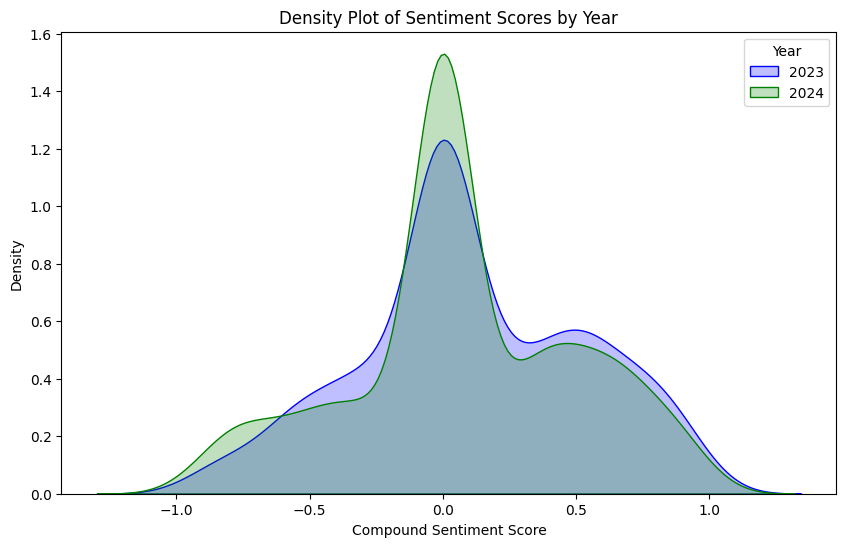

In [47]:
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting

# Plotting the density plot to compare sentiment distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_df[combined_df['Year'] == 2023]['VADER_Sentiment'], shade=True, color="b", label="2023")

# Include 2024 data if available
if 2024 in combined_df['Year'].unique():
    sns.kdeplot(combined_df[combined_df['Year'] == 2024]['VADER_Sentiment'], shade=True, color="g", label="2024")

plt.title('Density Plot of Sentiment Scores by Year')
plt.xlabel('Compound Sentiment Score')
plt.legend(title="Year")
plt.show()


In [49]:
# Function to categorize sentiment scores
def sentiment_category(score):
    if score > 0.5:
        return 'Very Positive'
    elif score > 0.1:
        return 'Positive'
    elif score > -0.1:
        return 'Near Neutral'
    elif score > -0.5:
        return 'Negative'
    else:
        return 'Very Negative'

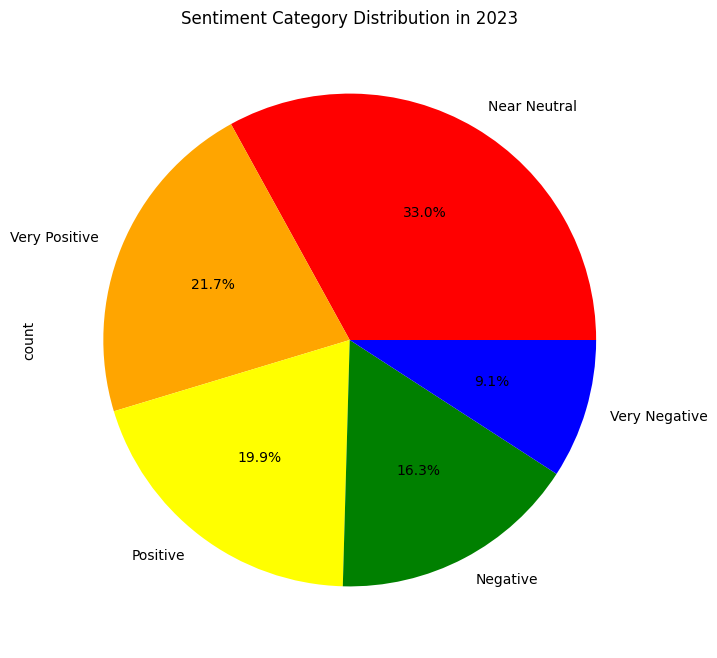

In [50]:
import matplotlib.pyplot as plt  # Plotting

# Calculate sentiment category distribution for 2023
combined_df['Sentiment_Category'] = combined_df['VADER_Sentiment'].apply(sentiment_category)

sentiment_category_2023 = combined_df[combined_df['Year'] == 2023]['Sentiment_Category'].value_counts()

# Plotting the pie chart for 2023
plt.figure(figsize=(8, 8))
sentiment_category_2023.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Sentiment Category Distribution in 2023')
plt.show()


<Figure size 1200x700 with 0 Axes>

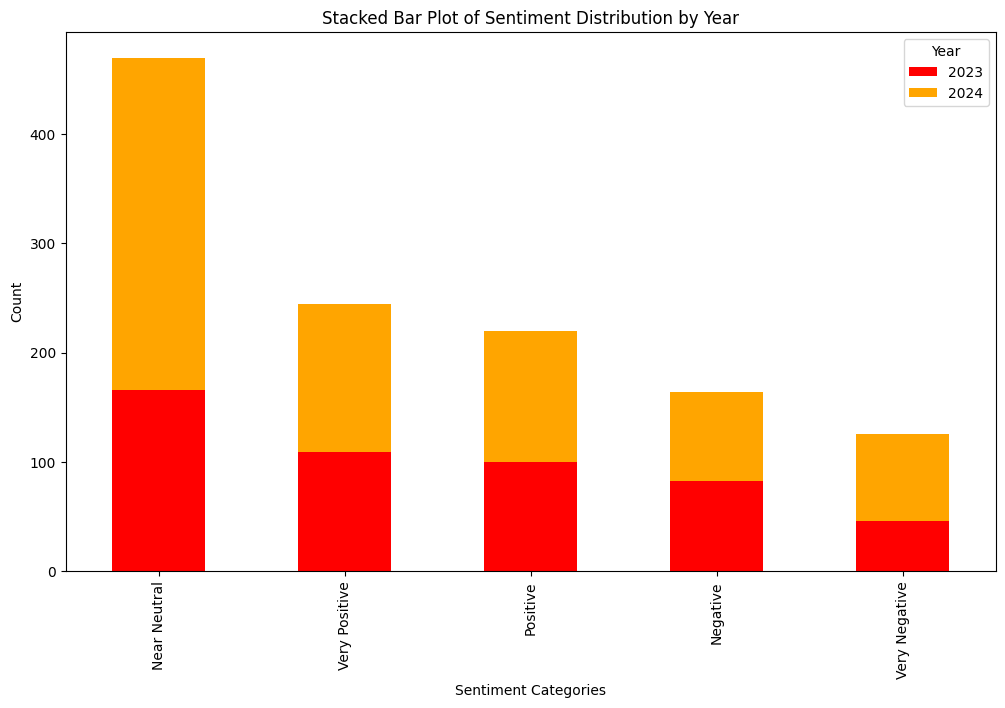

In [51]:
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting

# Assuming 'Sentiment_Category' column exists with categorical sentiment (Very Positive, Positive, etc.)
# Calculate the sentiment category distribution for each year
sentiment_distribution_2023 = combined_df[combined_df['Year'] == 2023]['Sentiment_Category'].value_counts()
sentiment_distribution_2024 = combined_df[combined_df['Year'] == 2024]['Sentiment_Category'].value_counts() if 2024 in combined_df['Year'].unique() else pd.Series()

# Combine the distributions into a DataFrame
df_sentiment_distribution = pd.DataFrame({'2023': sentiment_distribution_2023, '2024': sentiment_distribution_2024}).fillna(0)

# Plot the stacked bar plot
plt.figure(figsize=(12, 7))
df_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 7), color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Stacked Bar Plot of Sentiment Distribution by Year')
plt.xlabel('Sentiment Categories')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()